In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from bs4 import BeautifulSoup
from datetime import timedelta
from scipy.stats import expon

In [2]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import boxcox

In [3]:
from discord_utils import *

In [85]:
%run discord_utils.py

In [5]:
stock_vip = DiscordDataset('stock_vip.json')

In [6]:
stock_vip_stats = stock_vip.get_stats_for_df()

------------------------------------------

In [83]:
stock_vip_test = DiscordDataset('stock_vip_four_days.json')

In [86]:
stock_vip_test = stock_vip_test.get_stats_for_df()

------------------------------------------------

In [88]:
# transform dataa
X_test = stock_vip_test.drop(columns = ['next_day_return'])
y_test = np.log(stock_vip_test['next_day_return'] + 1)

In [89]:
X_test_transformed = scaler.transform(X_test)

In [94]:
X_test_pca = X_test_transformed.dot(pca.components_.T)

In [95]:
X_test_pca = pd.DataFrame(columns = ['pca1'], data = X_test_pca[:,0])
X_test_pca = sm.add_constant(X_test_pca)

<AxesSubplot:ylabel='next_day_return'>

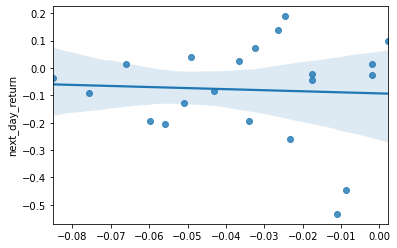

In [102]:
sns.regplot(x = results.predict(X_test_pca), y= y_test)

In [97]:
y_test

0    -0.192500
1    -0.037740
2    -0.447247
3    -0.259715
4    -0.045315
5     0.138611
6     0.097455
7     0.013468
8    -0.092563
9    -0.192353
10    0.025106
11    0.188901
12    0.073398
13    0.015006
14   -0.204638
15    0.041208
16   -0.083382
17   -0.128175
18   -0.533264
19   -0.022832
20   -0.027090
Name: next_day_return, dtype: float64

In [59]:
X = stock_vip_stats.drop(columns = ['next_day_return'])
# y = boxcox((np.exp(stock_vip_stats['next_day_return']) + 1).values)[0]
y = np.log(stock_vip_stats['next_day_return'] + 1)

In [60]:
cols = X.columns
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

In [61]:
pca = PCA(n_components = 5).fit(X)

In [62]:
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.1756859  0.11585462 0.10361306 0.09136377 0.08307782]
[20.78911512 16.88201303 15.96521628 14.9918269  14.2958535 ]


In [63]:
pca.components_.shape

(5, 20)

In [64]:
X_pca = X.dot(pca.components_.T)

In [65]:
X_pca = pd.DataFrame(columns = ['pca1'], data = X_pca[:,0])
X_pca = sm.add_constant(X_pca)

In [67]:
results = sm.OLS(y, X_pca).fit() # the r squared is too low...
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        next_day_return   R-squared:                       0.166
Model:                            OLS   Adj. R-squared:                  0.159
Method:                 Least Squares   F-statistic:                     24.09
Date:                Wed, 10 Feb 2021   Prob (F-statistic):           2.90e-06
Time:                        12:43:22   Log-Likelihood:                 94.674
No. Observations:                 123   AIC:                            -185.3
Df Residuals:                     121   BIC:                            -179.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0181      0.010     -1.773      0.0

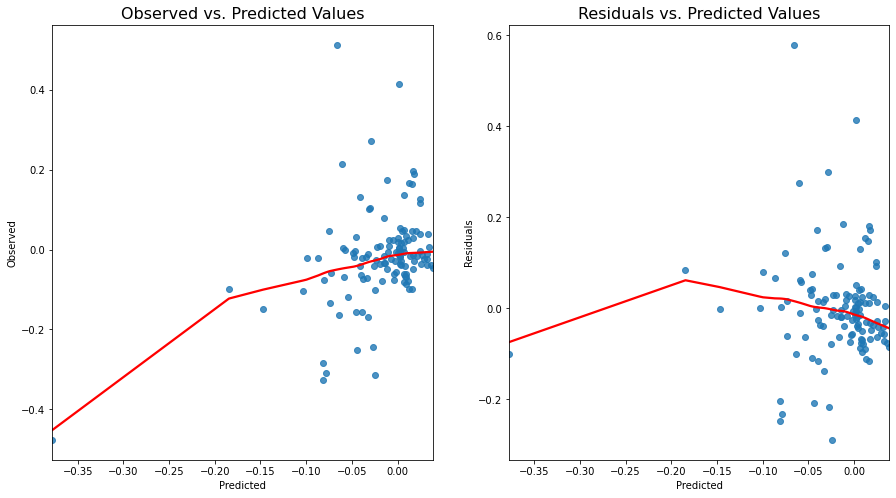

In [68]:
linearity_test(results, y)

In [82]:
results.predict(X_pca)

0     -0.009052
1     -0.058993
2     -0.057577
3      0.007923
4     -0.005225
         ...   
118    0.005779
119    0.002516
120    0.001070
121   -0.063943
122   -0.018657
Length: 123, dtype: float64

In [77]:
# what is PCA1?
pca_comp1 = pd.DataFrame(data=pca.components_[0]).T
pca_comp1.columns = cols

In [80]:
pca_comp1

,daily_return,daily_swing,log_volume,volume_diff,closing_price,market_cap,perc_ticker_messages,ticker_len_ratio,avg_ticker_stocks_mentioned,avg_ticker_replies,avg_ticker_reactions,most_active_user,message_clustering,perc_ticker_messages_RATIO,ticker_len_ratio_RATIO,avg_ticker_stocks_mentioned_RATIO,avg_ticker_replies_RATIO,avg_ticker_reactions_RATIO,most_active_user_RATIO,message_clustering_RATIO
0,0.367241,0.392055,0.332878,0.333772,-0.05199,0.012232,0.124724,-0.018035,0.189775,-0.180736,0.165369,-0.18689,0.398838,0.049336,0.045923,-0.124813,0.014493,0.114446,-0.024584,-0.382651


In [8]:
from sklearn.decomposition import PCA

In [9]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler = StandardScaler().fit(X)

In [13]:
X = scaler.transform(X)

In [744]:
stock_vip_stats.columns

Index(['daily_return', 'daily_swing', 'log_volume', 'volume_diff',
       'next_day_return', 'closing_price', 'market_cap',
       'perc_ticker_messages', 'ticker_len_ratio',
       'avg_ticker_stocks_mentioned', 'avg_ticker_replies',
       'avg_ticker_reactions', 'most_active_user', 'message_clustering',
       'perc_ticker_messages_RATIO', 'ticker_len_ratio_RATIO',
       'avg_ticker_stocks_mentioned_RATIO', 'avg_ticker_replies_RATIO',
       'avg_ticker_reactions_RATIO', 'most_active_user_RATIO',
       'message_clustering_RATIO'],
      dtype='object')

In [ ]:
X = stock_vip_stats[['message_clustering', 'avg_ticker_reactions', ]]

In [735]:
# regression
X = stock_vip_stats.drop(columns = ['next_day_return'])
# y = np.log(boxcox((stock_vip_stats['next_day_return'] + 1).values)[0] + 1)

In [736]:
y = boxcox((np.exp(stock_vip_stats['next_day_return']) + 1).values)[0]

In [737]:
X['daily_return'] = boxcox((stock_vip_stats['daily_return'] + 1).values)[0]# np.exp(boxcox((X['daily_return'] + 1).values)[0])
X['avg_ticker_stocks_mentioned'] = boxcox((X['avg_ticker_stocks_mentioned'].apply(lambda x: np.log(x+1))).values)[0]
X['message_clustering'] = boxcox((X['message_clustering'] + 1).values)[0]
X['avg_ticker_reactions'] = boxcox((X['avg_ticker_reactions'] + 1).values)[0]
X['daily_swing'] = boxcox((X['daily_swing'] + 1).values)[0]
X['most_active_user'] = boxcox((X['most_active_user'] + 1).values)[0]

In [738]:
X = sm.add_constant(X)

In [739]:
X = X.drop(columns = ['daily_swing', 'log_volume', 'ticker_len_ratio_RATIO'])

In [740]:
pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], 
                  index=X.columns)

const                                452.583581
daily_return                           1.544757
volume_diff                            1.532570
closing_price                          1.498964
market_cap                             1.526901
perc_ticker_messages                   1.674123
ticker_len_ratio                       2.224955
avg_ticker_stocks_mentioned            1.762658
avg_ticker_replies                     1.595659
avg_ticker_reactions                   1.940050
most_active_user                       2.913285
message_clustering                     1.905973
perc_ticker_messages_RATIO             1.323343
avg_ticker_stocks_mentioned_RATIO      1.245712
avg_ticker_replies_RATIO               1.204923
avg_ticker_reactions_RATIO             1.087641
most_active_user_RATIO                 1.331211
message_clustering_RATIO               1.445774
dtype: float64

In [664]:
X = X.drop(columns = ['closing_price', 'perc_ticker_messages', 'avg_ticker_reactions', 'ticker_len_ratio',
                      'perc_ticker_messages_RATIO', 'most_active_user_RATIO', 'avg_ticker_reactions_RATIO',
                      'avg_ticker_stocks_mentioned_RATIO', 'avg_ticker_replies_RATIO', 'message_clustering_RATIO',
                      'avg_ticker_replies', 'volume_diff', 'market_cap'])

In [742]:
cols = ['daily_return', 'avg_ticker_stocks_mentioned', 'most_active_user', 'message_clustering']
# cols = list(X.columns) # .remove('const')
# cols = ['message_clustering', ]
for i, col in enumerate(cols):
    j = i
    while j < len(cols):
        col_name = col + '_X_' + cols[j]
        X[col_name] = X[col] * X[cols[j]]
        j += 1

In [588]:
X = X.drop(columns = ['most_active_user_X_message_clustering', 'daily_return_X_avg_ticker_stocks_mentioned', 
                      'avg_ticker_stocks_mentioned_X_message_clustering', 'avg_ticker_stocks_mentioned_X_most_active_user', 
                      'message_clustering'])

In [666]:
X = X.drop(columns = ['most_active_user_X_most_active_user', 'message_clustering_X_message_clustering', 
        'avg_ticker_stocks_mentioned_X_most_active_user',  'avg_ticker_stocks_mentioned_X_avg_ticker_stocks_mentioned',
        'message_clustering', 'most_active_user_X_message_clustering', 'daily_return_X_avg_ticker_stocks_mentioned', 
        'avg_ticker_stocks_mentioned', 'daily_return_X_most_active_user'])

In [667]:
# X['daily_return_X_daily_return'] = np.log(X['daily_return_X_daily_return'] + 1)
X['daily_return_X_daily_return'] = boxcox((X['daily_return_X_daily_return'] + 1).values)[0]

In [668]:
X['daily_return_X_message_clustering'] = boxcox((X['daily_return_X_message_clustering'] + 1.5).values)[0]

In [617]:
# X['daily_return_X_message_clustering'] = boxcox((X['daily_return_X_message_clustering'] + 1).values)[0]

In [645]:
# X['daily_return_X_most_active_user'] = boxcox((X['daily_return_X_most_active_user'] + 1.5).values)[0]

In [669]:
X = X.drop(columns = ['avg_ticker_stocks_mentioned_X_message_clustering', ])

In [671]:
# X =  X[['most_active_user_X_most_active_user']]

Index(['const', 'daily_return', 'volume_diff', 'closing_price', 'market_cap',
       'perc_ticker_messages', 'ticker_len_ratio',
       'avg_ticker_stocks_mentioned', 'avg_ticker_replies',
       'avg_ticker_reactions',
       ...
       'avg_ticker_replies_RATIO_X_avg_ticker_replies_RATIO',
       'avg_ticker_replies_RATIO_X_avg_ticker_reactions_RATIO',
       'avg_ticker_replies_RATIO_X_most_active_user_RATIO',
       'avg_ticker_replies_RATIO_X_message_clustering_RATIO',
       'avg_ticker_reactions_RATIO_X_avg_ticker_reactions_RATIO',
       'avg_ticker_reactions_RATIO_X_most_active_user_RATIO',
       'avg_ticker_reactions_RATIO_X_message_clustering_RATIO',
       'most_active_user_RATIO_X_most_active_user_RATIO',
       'most_active_user_RATIO_X_message_clustering_RATIO',
       'message_clustering_RATIO_X_message_clustering_RATIO'],
      dtype='object', length=171)

In [743]:
results = sm.OLS(y, X).fit() # the r squared is too low...
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.364
Method:                 Least Squares   F-statistic:                     3.589
Date:                Tue, 09 Feb 2021   Prob (F-statistic):           2.20e-06
Time:                        16:20:22   Log-Likelihood:                 560.43
No. Observations:                 123   AIC:                            -1065.
Df Residuals:                      95   BIC:                            -986.1
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                                                                coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------

IndexError: list index out of range

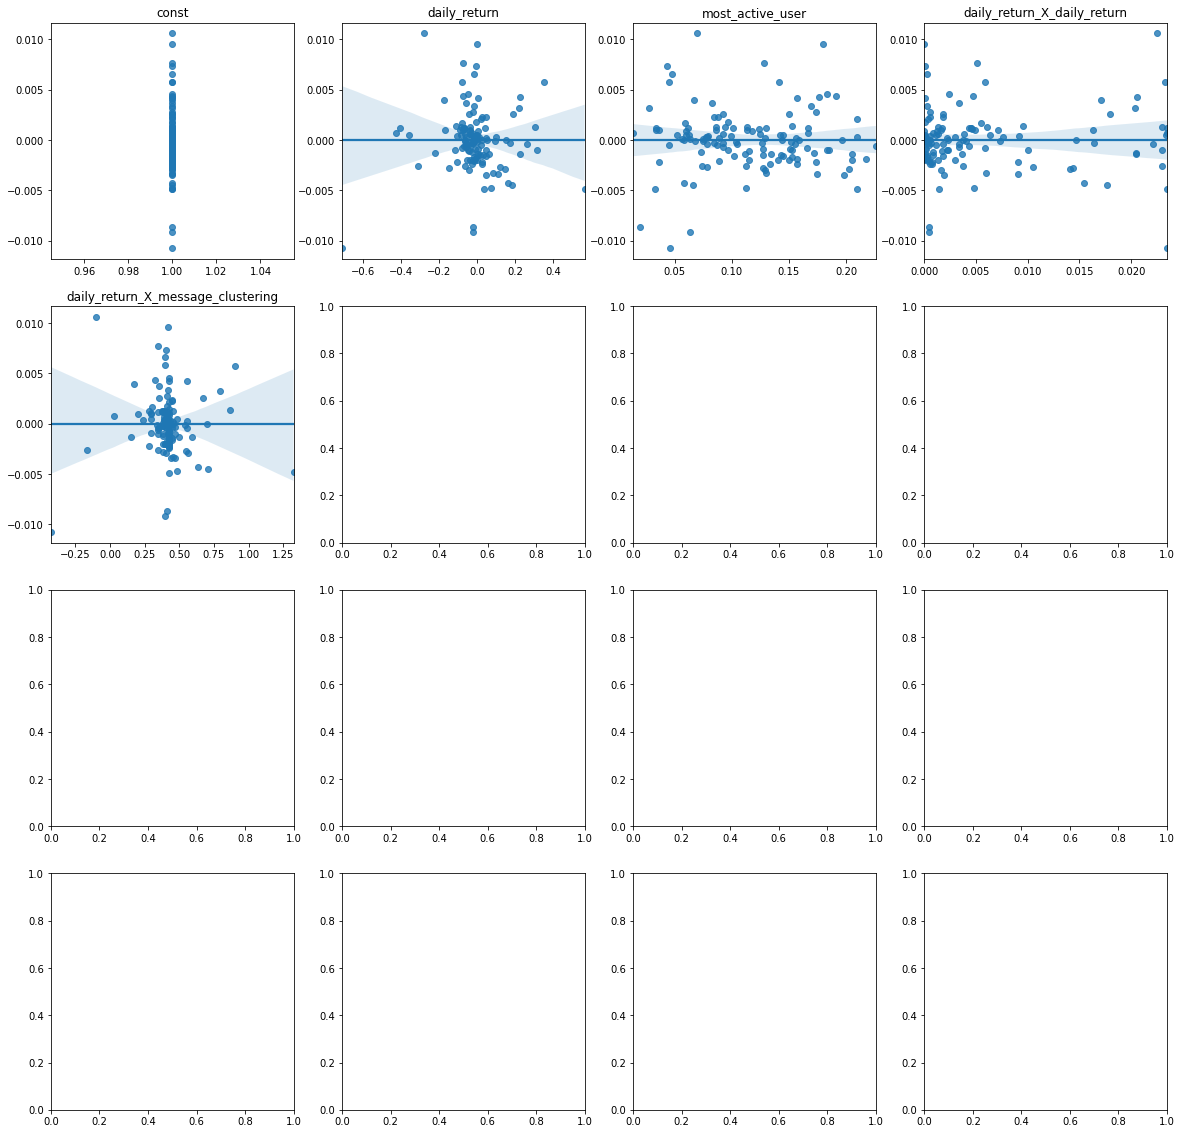

In [673]:
fig, axs = plt.subplots(4,4, figsize=(20,20))
cols = list(X.columns)

for i, ax in enumerate(axs.flat):
    sns.regplot(x = X[cols[i]].values, y = results.resid, ax=ax)
    ax.set_title(cols[i])

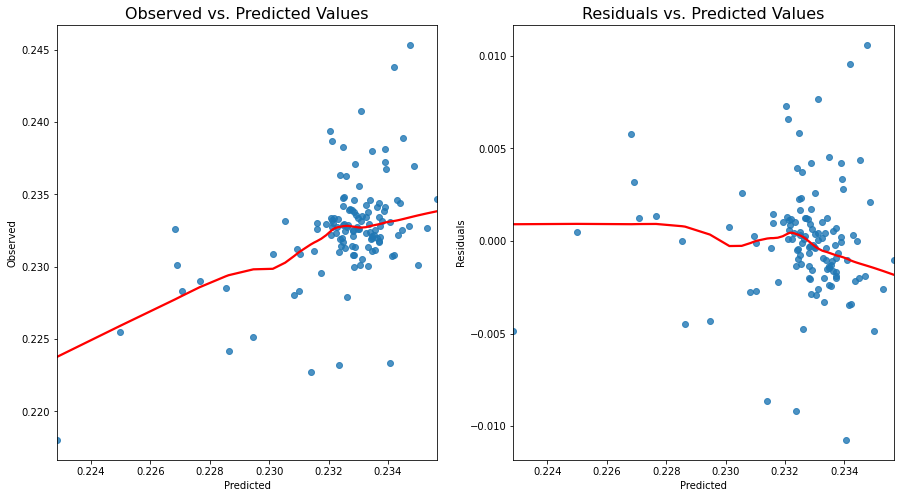

In [674]:
linearity_test(results, y)

In [4]:
# free_chat = DiscordDataset('stock_vip_free_chat.json')

In [31]:
# free_chat_stats = free_chat.get_stats_for_df()

-------------------------------------------

In [32]:
free_chat_stats

,daily_return,daily_swing,log_volume,volume_diff,next_day_return,closing_price,market_cap,perc_ticker_messages,ticker_len_ratio,avg_ticker_stocks_mentioned,...,avg_ticker_reactions,most_active_user,message_clustering,perc_ticker_messages_RATIO,ticker_len_ratio_RATIO,avg_ticker_stocks_mentioned_RATIO,avg_ticker_replies_RATIO,avg_ticker_reactions_RATIO,most_active_user_RATIO,message_clustering_RATIO
0,0.222506,0.249830,17.470681,1.027298,-0.036780,2.730464,19.796109,0.323805,0.024562,1.130210,...,0.100776,0.069588,12.907840,0.080579,-0.137302,0.016077,-0.017714,-0.102924,-0.010145,-6.713552
1,0.056903,0.108412,19.203364,-0.256866,-0.066292,3.807107,22.504122,0.215536,0.128007,1.185769,...,0.149175,0.088942,16.738519,-0.082078,0.179136,0.051538,-0.081321,-0.158696,0.052885,-17.049346
2,-0.220713,0.398333,20.444629,1.261291,0.068293,0.377751,20.160478,0.224622,-0.078327,1.097029,...,0.153267,0.086897,13.499831,0.097736,-0.024852,-0.046818,-0.026366,-0.045431,0.071604,5.564770
3,-0.038386,0.135673,17.365395,-0.452624,-0.043326,3.557346,21.654261,0.043224,-0.165674,1.120926,...,0.023661,0.276158,4.019638,-0.049536,-0.091211,-0.060034,-0.113958,-0.047322,0.174957,-3.248680
4,-0.063545,0.085973,19.254259,2.094223,-0.043758,3.632082,23.728382,0.016703,-0.014071,1.012821,...,0.123539,0.238462,1.503114,-0.016627,-0.011457,-0.025641,-0.088528,0.117738,0.323077,-3.006228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
810,-0.006127,0.049398,13.075483,0.370695,-0.072549,3.231989,18.214384,0.002166,0.039169,1.038462,...,0.237033,0.176923,0.594268,0.003007,0.912005,0.076923,-0.121524,0.007385,-0.046154,1.188536
811,-0.054762,0.149554,17.700436,-0.257358,-0.030075,1.603420,20.205478,0.001800,-0.087788,1.118056,...,0.290091,0.638889,0.000000,0.001481,-0.266779,-0.013889,0.216107,0.580181,0.277778,0.000000
812,-0.048038,0.126214,16.701015,0.062046,-0.007117,2.712706,19.779618,0.001275,-0.128385,1.033333,...,0.097194,0.350000,0.293562,-0.001421,0.505685,-0.066667,-0.130885,-0.194389,0.300000,-0.587125
813,-0.074692,0.157895,17.711963,-0.642761,0.024096,2.444952,20.314713,0.001368,0.549044,1.450000,...,1.192268,0.650000,-0.360629,0.000087,-0.115806,-0.500000,0.194449,1.801208,-0.100000,0.721259


## variables on chat general dynamics
* avg length of a message mentioning a ticker
* avg number of stocks mentioned in that message with ticker
* percent of ticker messages that ticker is in
* percent of messages with tickers
* previous movements of that stock (previous day's change)
* average number of replies/likes to each message
* the number of distinct users mentioning the ticker
* the number of posts by the most frequent poster
* Each of these variables split from during trading hours and after trading hours

## variables particular to stock
* Previous day return, volatility (maybe abs(high - low) is better)
* 5 Day moving avg volume
* That days trading volume
* the distribution of the tickers over time (ie. spread out/independent or in response)


*note: could look at two strategies, buy before close or buy at open...
for now will just look at predicting Tuesday-Friday movements.

### check for patterns in arrival of messages

In [16]:
# t = stock_vip_free_chat[stock_vip_free_chat['tickers'].apply(lambda x: "amc" in x)].reset_index(drop=True) 

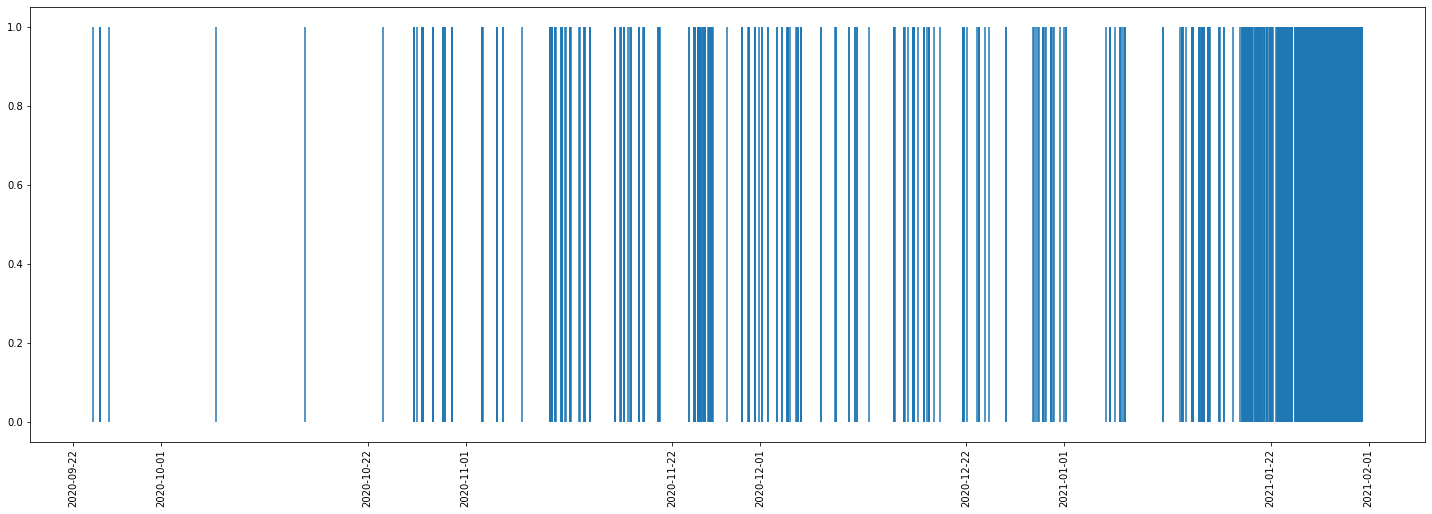

In [61]:
# fig, ax = plt.subplots(figsize=(25,8))
# ax.vlines(t['timestamp'].values, ymin = 0, ymax= 1)
# plt.xticks(rotation=90)
# plt.show()

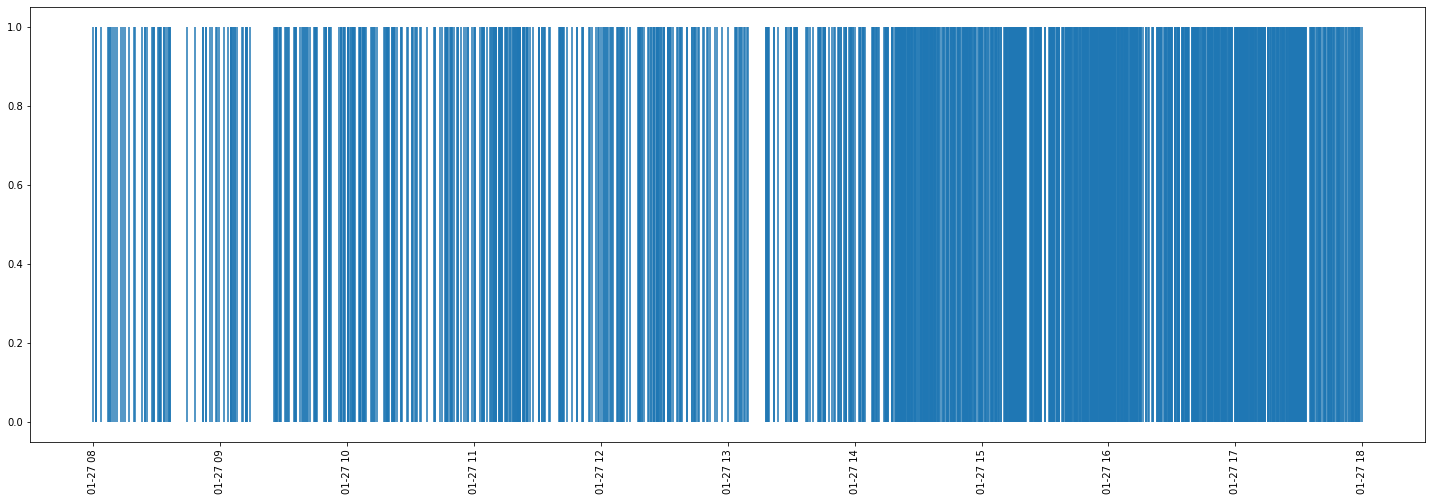

In [197]:
# t = stock_vip_free_chat[stock_vip_free_chat['tickers'].apply(lambda x: "gme" in x)].reset_index(drop=True) 
# t = t.loc[(t['timestamp'] > '2021-01-27') & (t['timestamp'] < '2021-01-27 10:00:00')].reset_index(drop=True)
# fig, ax = plt.subplots(figsize=(25,8))
# ax.vlines(t['timestamp'].values, ymin = 0, ymax= 1)
# plt.xticks(rotation=90)
# plt.show()

In [375]:
X = df.drop(columns=['next_day_return'])
y = df[['next_day_return']]

In [ ]:
# two distributions - one from down 100% to even and one up...

### check how daily returns are distributed 

In [291]:
pos_returns = y.loc[y['next_day_return'] > 0].values.flatten()

In [292]:
quantiles = pd.qcut(pos_returns, q = len(pos_returns), labels=False)
quantiles = 1 - (quantiles / max(quantiles))

(0.001, 1)

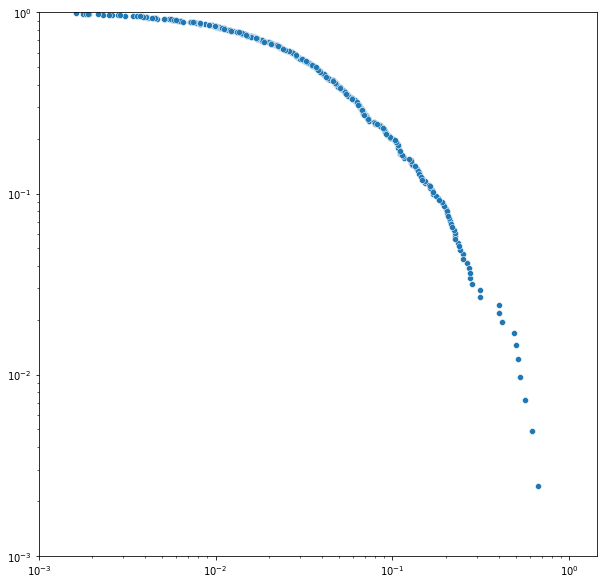

In [301]:
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(x = pos_returns, y = quantiles, ax=ax)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlim(left = 10**-3)
ax.set_ylim([10e-4,1])

In [302]:
neg_returns = abs(y.loc[y['next_day_return'] < 0].values.flatten())
quantiles = pd.qcut(neg_returns, q = len(neg_returns), labels=False)
quantiles = 1 - quantiles / max(quantiles)

(0.001, 1)

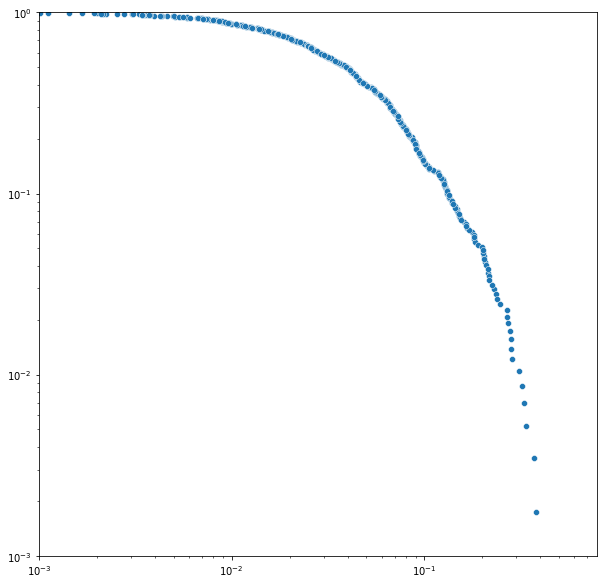

In [303]:
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(x = neg_returns, y = quantiles, ax=ax)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlim(left = 10**-3)
ax.set_ylim([10e-4,1])

In [318]:
from scipy.stats import powerlaw

In [362]:
from scipy.stats import lognorm

0.9797626689751207 -0.002246126612338079 0.03899521889667946
1.2051593835173127 -0.0010261765412220543 0.035907352923572514


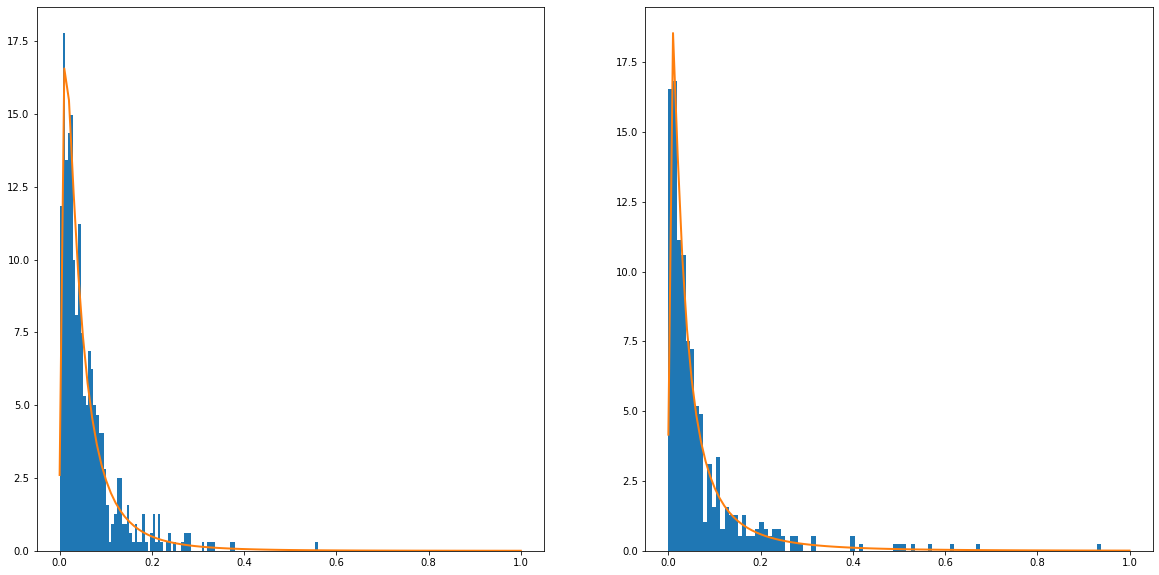

In [374]:
fig, axs = plt.subplots(1,2, figsize=(20,10))
returns = [neg_returns, pos_returns]
for i, ax in enumerate(axs.flat):
    s, loc, scale = lognorm.fit(returns[i])
    print(s, loc, scale)
    ax.hist(returns[i], 100, density=True)
    x = np.linspace(0, 1, 100)
    ax.plot(x, lognorm(s, loc, scale).pdf(x), lw=2)

plt.show()

In [341]:
from scipy.stats import beta

In [342]:
a1, b1, loc1, scale1 = beta.fit(neg_returns)

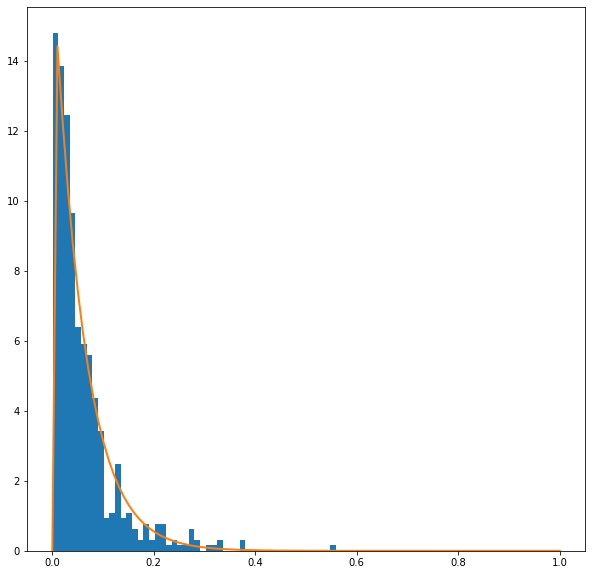

In [353]:
fig, ax = plt.subplots(figsize=(10,10))
ax.hist(neg_returns, 50, density=True)
x = np.linspace(0, 1, 100)
ax.plot(x, beta(a1, b1, loc1, scale1).pdf(x), lw=2)

In [37]:
import statsmodels.api as sm

In [38]:
from scipy.stats import boxcox

In [168]:
X = free_chat_stats.drop(columns=['next_day_return'])
# y = np.log(free_chat_stats[['next_day_return']] + 1)
y = free_chat_stats[['next_day_return']]

In [169]:
# transform variables so residuals fit...

In [170]:
X['daily_return'] = X['daily_return'].apply(lambda x: np.exp(1 / np.sqrt(x + 1)))

In [171]:
X['daily_swing'] = X['daily_swing'].apply(lambda x: 1 / np.exp(x))

In [172]:
X['log_volume'] = boxcox((X['log_volume'] + 1).values)[0] #.apply(lambda x: np.exp(np.exp(x))) #np.exp(1 / np.sqrt(x + 1)))

In [173]:
X['avg_ticker_stocks_mentioned'] = boxcox((X['avg_ticker_stocks_mentioned'].apply(lambda x: np.log(x+1))).values)[0]

In [174]:
X['avg_ticker_reactions'] = boxcox((X['avg_ticker_reactions'].apply(lambda x: np.log(x+2))).values)[0]

In [175]:
X['avg_ticker_replies'] = boxcox((X['avg_ticker_replies'] + 1).values)[0]

In [176]:
X['perc_ticker_messages_RATIO'] = boxcox((X['perc_ticker_messages_RATIO'].apply(lambda x: x + 10)).values)[0]

In [177]:
X['avg_ticker_stocks_mentioned_RATIO'] = boxcox((X['perc_ticker_messages_RATIO'].apply(lambda x: np.log(x + 100))).values)[0]

In [178]:
X['message_clustering'] = boxcox((X['message_clustering'] + 1).values)[0]

In [179]:
X['perc_ticker_messages'] = X['perc_ticker_messages'].apply(lambda x: np.log(x))

In [218]:
X = sm.add_constant(X)

In [181]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# drop variables to see effect on VIF

In [182]:
X = X.drop(columns = ['avg_ticker_stocks_mentioned_RATIO'])

In [183]:
X = X.drop(columns = ['market_cap'])

In [184]:
X = X.drop(columns = ['perc_ticker_messages'])

In [185]:
X = X.drop(columns = ['daily_swing'])

In [412]:
X = X.drop(columns = ['perc_ticker_messages_RATIO'])

In [415]:
X = X.drop(columns = ['daily_return'])

In [416]:
X = X.drop(columns = ['log_volume'])

In [381]:
X = X.drop(columns = ['avg_ticker_reactions'])

In [386]:
X = X.drop(columns = ['avg_ticker_replies'])

In [387]:
X = X.drop(columns = ['avg_ticker_stocks_mentioned'])

In [388]:
X = X.drop(columns = ['most_active_user'])

In [389]:
X =  X.drop(columns = ['closing_price'])

In [390]:
X  = X.drop(columns =  ['message_clustering'])

In [53]:
pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], 
                  index=X.columns)

const                          47342.536104
daily_return                       1.302402
log_volume                         1.542284
volume_diff                        1.444269
closing_price                      1.170792
ticker_len_ratio                   1.374078
avg_ticker_stocks_mentioned        1.111291
avg_ticker_replies                 1.554677
avg_ticker_reactions               1.184300
most_active_user                   1.569047
message_clustering                 1.746597
perc_ticker_messages_RATIO         1.072276
ticker_len_ratio_RATIO             1.170589
avg_ticker_replies_RATIO           1.233921
avg_ticker_reactions_RATIO         1.099153
most_active_user_RATIO             1.169492
message_clustering_RATIO           1.209865
dtype: float64

In [ ]:
# R2 is too low and data is transformed correctly, so there doesn't look like there's signal in this data...

In [95]:
results = sm.OLS(y, X).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        next_day_return   R-squared:                       0.080
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     4.339
Date:                Mon, 08 Feb 2021   Prob (F-statistic):           3.14e-08
Time:                        17:23:49   Log-Likelihood:                 709.02
No. Observations:                 815   AIC:                            -1384.
Df Residuals:                     798   BIC:                            -1304.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [ ]:
# remove variables that don't add to regression

In [186]:
X = X.drop(columns = ['volume_diff'])

In [187]:
X = X.drop(columns = ['avg_ticker_reactions'])

In [188]:
X = X.drop(columns = ['avg_ticker_replies_RATIO'])

In [189]:
X = X.drop(columns = ['avg_ticker_reactions_RATIO'])

In [190]:
X = X.drop(columns = ['most_active_user_RATIO'])

In [191]:
X = X.drop(columns = ['ticker_len_ratio'])

In [192]:
X = X.drop(columns = ['ticker_len_ratio_RATIO'])

In [193]:
X = X.drop(columns = ['avg_ticker_replies'])

In [194]:
X = X.drop(columns = ['closing_price'])

In [195]:
X = X.drop(columns = ['const'])

In [196]:
X = X.drop(columns = ['most_active_user'])

In [214]:
# X['perc_ticker_messages_RATIO'] =  boxcox((X['perc_ticker_messages_RATIO']).values)[0]
X['perc_ticker_messages_RATIO'] = X['perc_ticker_messages_RATIO'].apply(lambda x: np.log(x))

In [113]:
X['message_clustering_RATIO'] = X['message_clustering_RATIO'].apply(lambda x: x)

In [225]:
X = X.drop(columns = ['perc_ticker_messages_RATIO'])

In [125]:
y = boxcox((y['next_day_return'] + 1).values)[0]

In [198]:
y = y['next_day_return'].apply(lambda x: np.sqrt(x+1))

In [226]:
results = sm.OLS(y, X).fit() # the r squared is too low...
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        next_day_return   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     13.61
Date:                Mon, 08 Feb 2021   Prob (F-statistic):           1.14e-08
Time:                        17:40:40   Log-Likelihood:                 1257.3
No. Observations:                 815   AIC:                            -2507.
Df Residuals:                     811   BIC:                            -2488.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [220]:
# show that with all variables included, the residuals are acceptable

IndexError: list index out of range

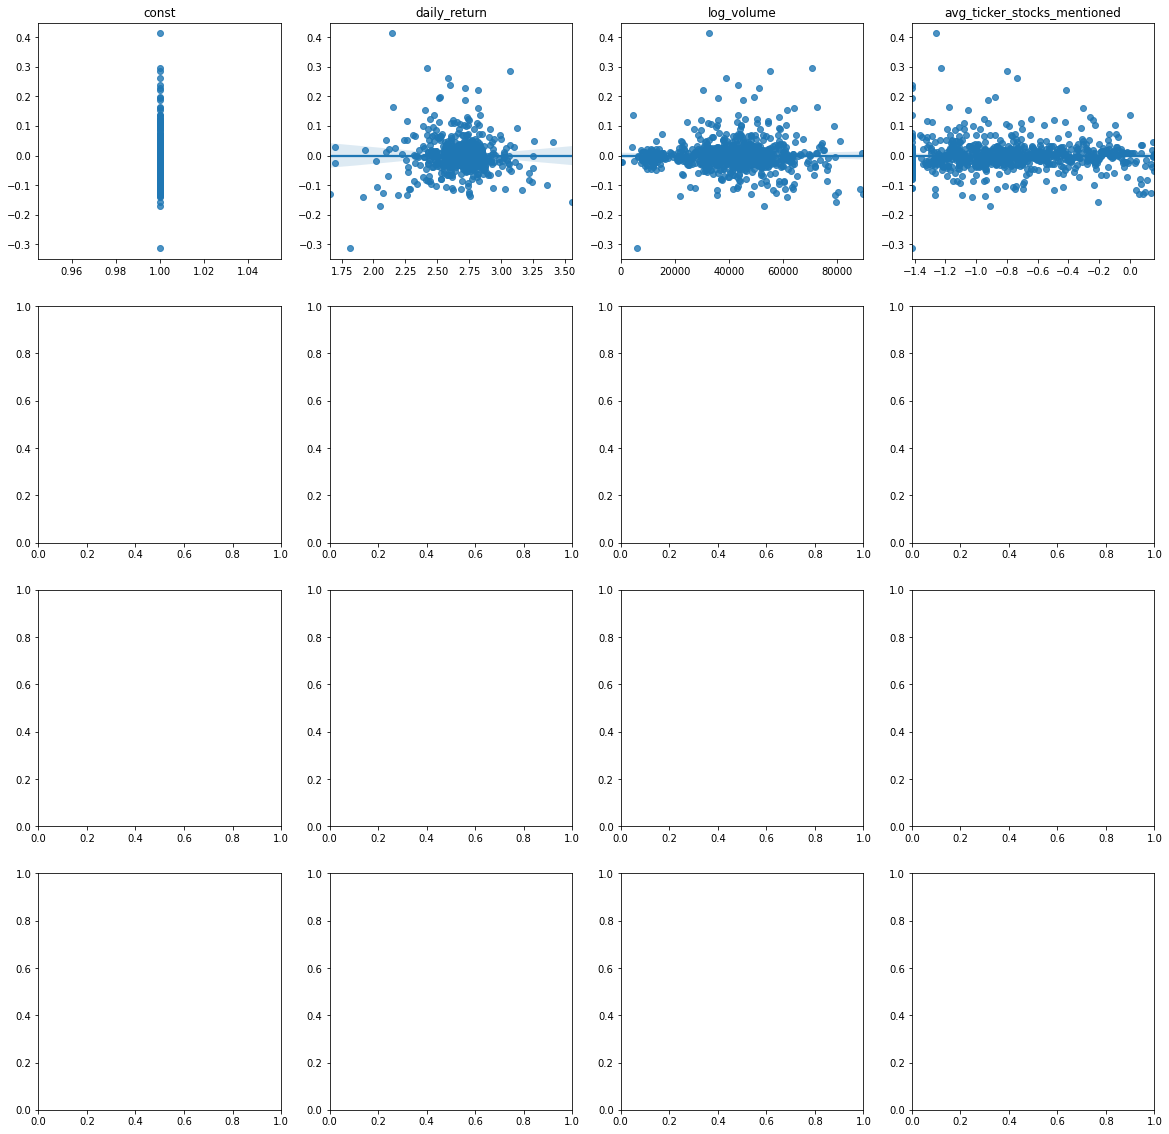

In [227]:
fig, axs = plt.subplots(4,4, figsize=(20,20))
cols = list(X.columns)

for i, ax in enumerate(axs.flat):
    sns.regplot(x = X[cols[i]].values, y = results.resid, ax=ax)
    ax.set_title(cols[i])

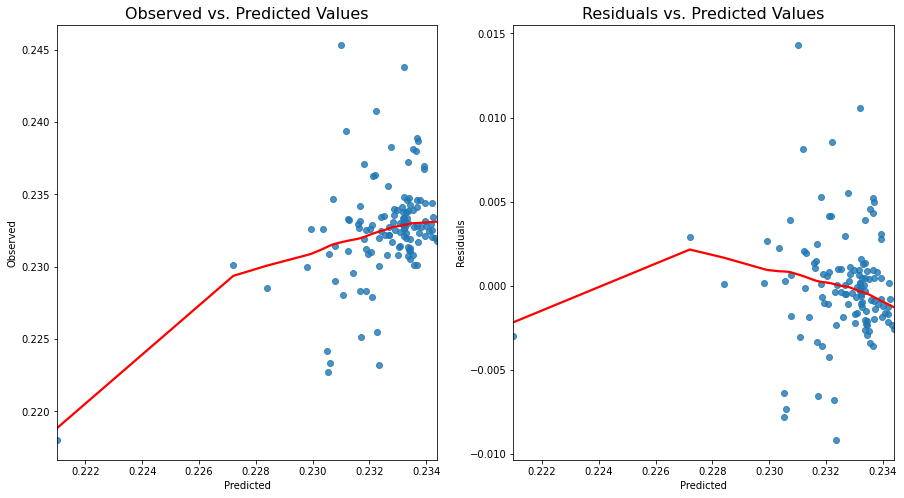

In [45]:
import seaborn as sns 
import matplotlib.pyplot as plt
# import statsmodels.stats.api as sms
# sns.set_style('darkgrid')
# sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

def linearity_test(model, y):
    '''
    Function for visually inspecting the assumption of linearity in a linear regression model.
    It plots observed vs. predicted values and residuals vs. predicted values.
    
    Args:
    * model - fitted OLS model from statsmodels
    * y - observed values
    '''
    fitted_vals = model.predict()
    resids = model.resid

    fig, ax = plt.subplots(1,2, figsize=(15,8))
    
    sns.regplot(x=fitted_vals, y=y, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Observed vs. Predicted Values', fontsize=16)
    ax[0].set(xlabel='Predicted', ylabel='Observed')

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Residuals vs. Predicted Values', fontsize=16)
    ax[1].set(xlabel='Predicted', ylabel='Residuals')
    
linearity_test(results, y)

array([[<AxesSubplot:title={'center':'next_day_return'}>]], dtype=object)

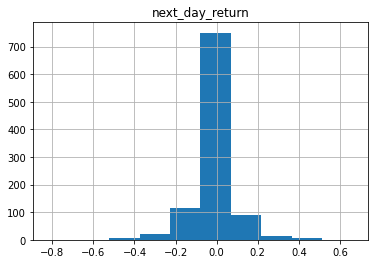

In [997]:
y.hist()

In [56]:
day = days_to_test[40]
df = stock_vip_free_chat.loc[stock_vip_free_chat['date'] == day].reset_index(drop=True)

In [57]:
gs = extract_general_stats_for_day(df)

In [79]:
ss = extract_stock_specific_stats(df, 'gme', day)

In [84]:
pd.concat([ss, gs], axis = 1)

,daily_return,daily_swing,volume_ratio,swing_ratio,perc_ticker_messages,ticker_len_ratio,avg_stocks_mentioned,avg_ticker_replies,avg_ticker_reactions,most_active_user,next_day_return,len_ratio,avg_stocks_mentioned,percent_ticker_messages,replies_ratio,reactions_ratio,users_ratio,biggest_ticker
0,-0.206141,0.615969,0.675566,5.042322,0.221398,0.058819,1.125906,0.076127,0.191025,0.040761,0.670958,0.714296,1.132959,0.310976,0.180075,0.858078,0.562336,0.231879


In [58]:
gs

,len_ratio,avg_stocks_mentioned,percent_ticker_messages,replies_ratio,reactions_ratio,users_ratio,biggest_ticker
0,0.714296,1.132959,0.310976,0.180075,0.858078,0.562336,0.231879


In [52]:
# ticker_counts = pd.DataFrame(pd.Series(all_tickers).value_counts()).reset_index().rename(columns={'index': 'ticker', 0: 'count'})

In [169]:
# time is relative to the number of ticker symbols sent scaled for active users in chat per day (moving avg)
# ie n_tickers = n_users / 100
stock_active_users = stock_vip_free_chat.groupby(pd.Grouper(key='timestamp',freq='1D')).apply(
    lambda group: len(set(group['author_id']))).reset_index().rename(columns={0: 'daily_active_users'}) #.set_index('timestamp')

In [170]:
stock_active_users['date'] = stock_active_users['timestamp'].apply(lambda d: d.date())

In [171]:
stock_active_users = stock_active_users.drop(columns = ['timestamp'])

In [180]:
stock_active_users

,daily_active_users,date
0,162,2020-09-22
1,279,2020-09-23
2,568,2020-09-24
3,602,2020-09-25
4,201,2020-09-26
...,...,...
127,8166,2021-01-27
128,13682,2021-01-28
129,12787,2021-01-29
130,6201,2021-01-30


In [155]:
#stock_vip_free_chat['date'] = stock_vip_free_chat['timestamp'].apply(lambda d: d.date())

In [179]:
stock_vip_free_chat = stock_vip_free_chat.merge(stock_active_users, 'left', on = ['date'])

In [175]:
stock_vip_free_chat['n_tickers'] = stock_vip_free_chat['tickers'].apply(lambda x: len(x))

In [184]:
np.mean(stock_vip_filtered['n_tickers'])

1.2122235970395263

In [185]:
stock_vip_filtered['group'] = 0

In [187]:
int(9.11)

9

In [191]:
prev_index = 0
current_index = int(stock_vip_filtered.loc[0, 'daily_active_users'] * 1.21) # 1.21 is mean number of tickers per message
start_times = []
end_times = []
list_of_tickers = []
while current_index < stock_vip_filtered.shape[0]:
    start_times.append(stock_vip_filtered.loc[prev_index, 'timestamp'])
    end_times.append(stock_vip_filtered.loc[current_index, 'timestamp'])
    local_tickers = [tick for sublist in stock_vip_filtered.loc[prev_index: current_index, 'tickers'] for tick in sublist]
    list_of_tickers.append(local_tickers)
    prev_index = current_index
    current_index = current_index + int(stock_vip_filtered.loc[current_index, 'daily_active_users'] * 1.21)

In [ ]:
# get the percentage of each stock in each 

In [199]:
tickers_as_dicts = []
for l in list_of_tickers:
    tickers_as_dicts.append(dict(pd.Series(l).value_counts() / len(l)))

In [201]:
stationary_percentages = pd.DataFrame({'start_time': start_times, 'end_time': end_times, 'tickers': tickers_as_dicts})

In [210]:
for t in tickers_of_interest:
    stationary_percentages[t] = 0

In [214]:
for i in range(stationary_percentages.shape[0]):
    d = stationary_percentages.loc[i, 'tickers']
    for key in d.keys():
        if key in stationary_percentages.columns:
            stationary_percentages.loc[i, key] = d[key]

In [215]:
stationary_percentages

,start_time,end_time,tickers,amc,nio,sndl,nok,zom,nakd,cciv,...,dgly,rh,itll,veru,uwmc,fcel,cars,gnus,dpw,cbat
0,2020-09-22 08:50:24.362000+00:00,2020-09-22 23:36:19.280000+00:00,"{'tsla': 0.102803738317757, 'pt': 0.0373831775...",0.000000,0.009346,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.018692,0.0,0.000000,0.000000,0.023364,0.000000,0.000000,0.000000
1,2020-09-22 23:36:19.280000+00:00,2020-09-23 17:45:21.329000+00:00,"{'spi': 0.1932367149758454, 'uone': 0.12560386...",0.000000,0.019324,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.004831,0.019324,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.004831
2,2020-09-23 17:45:21.329000+00:00,2020-09-23 20:12:45.154000+00:00,"{'spi': 0.3789173789173789, 'uone': 0.17094017...",0.000000,0.005698,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.002849,0.000000,0.002849,0.0,0.000000,0.000000,0.002849,0.000000,0.008547,0.059829
3,2020-09-23 20:12:45.154000+00:00,2020-09-24 13:09:54.336000+00:00,"{'uone': 0.16292134831460675, 'spi': 0.1404494...",0.002809,0.011236,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.014045,0.000000,0.008427,0.0,0.000000,0.000000,0.000000,0.000000,0.019663,0.002809
4,2020-09-24 13:09:54.336000+00:00,2020-09-24 17:33:41.246000+00:00,"{'uone': 0.2857142857142857, 'sunw': 0.2653061...",0.000000,0.013605,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.001361,0.004082,0.0,0.000000,0.000000,0.001361,0.001361,0.000000,0.005442
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,2021-01-27 15:05:14.472000+00:00,2021-01-27 18:23:36.680000+00:00,"{'amc': 0.5451273381687299, 'nok': 0.141517151...",0.545127,0.000982,0.006490,0.141517,0.001963,0.100453,0.007689,...,0.000000,0.000436,0.000600,0.0,0.001309,0.000218,0.000000,0.001472,0.000000,0.000273
243,2021-01-27 18:23:36.680000+00:00,2021-01-27 22:20:04.447000+00:00,"{'amc': 0.3333986748735641, 'nakd': 0.23275963...",0.333399,0.002039,0.004705,0.204846,0.000941,0.232760,0.007959,...,0.000157,0.000392,0.000314,0.0,0.000392,0.000078,0.000157,0.025522,0.000000,0.000157
244,2021-01-27 22:20:04.447000+00:00,2021-01-28 06:27:15.639000+00:00,"{'amc': 0.34772542125798567, 'nok': 0.29022852...",0.347725,0.001929,0.042447,0.290229,0.001115,0.167217,0.008618,...,0.000000,0.000214,0.000643,0.0,0.000257,0.000000,0.000000,0.000729,0.000000,0.000043
245,2021-01-28 06:27:15.639000+00:00,2021-01-28 22:08:13.404000+00:00,"{'amc': 0.3492063492063492, 'nakd': 0.14239165...",0.349206,0.003165,0.058698,0.139273,0.002653,0.142392,0.009263,...,0.000000,0.004748,0.000698,0.0,0.000419,0.000047,0.000093,0.002560,0.000000,0.000140


In [257]:
stationary_percentages_filtered = stationary_percentages.drop(columns=['start_time', 'end_time','tickers'])[230:].reset_index(drop=True)

In [258]:
stocks_of_interest = pd.DataFrame(list(zip(stationary_percentages_filtered.columns, stationary_percentages_filtered.apply(
    lambda x: max(x), axis = 0)))).sort_values(by=1, ascending=False).reset_index(drop=True)[:7][0].to_list()

In [259]:
stationary_percentages_filtered = stationary_percentages_filtered[stocks_of_interest]

In [261]:
sns.set_style('white')
sns.set_context('notebook')

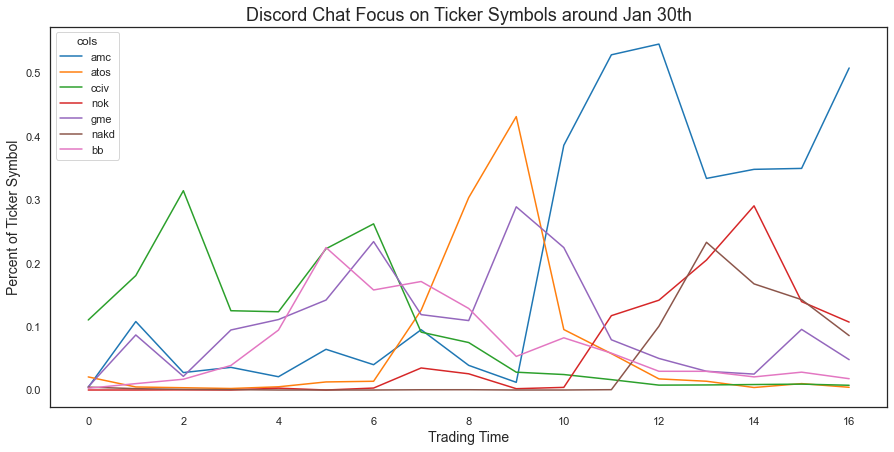

In [265]:
fig, ax = plt.subplots(figsize=(15,7))
df = stationary_percentages_filtered.reset_index()
df = df.melt('index', var_name='cols', value_name='vals')
sns.lineplot(x="index", y="vals", hue='cols', data=df, ax=ax)
ax.set_xlabel('Trading Time', fontsize=14)
ax.set_ylabel('Percent of Ticker Symbol', fontsize=14)
ax.set_title('Discord Chat Focus on Ticker Symbols around Jan 30th', fontsize=18)
plt.show()

In [182]:
stock_vip_filtered = stock_vip_free_chat.loc[stock_vip_free_chat['n_tickers'] > 0].reset_index(drop=True)

<AxesSubplot:>

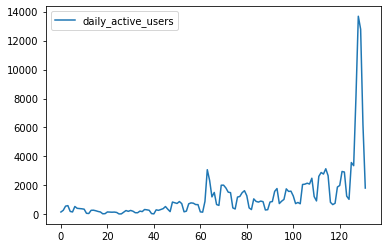

In [173]:
stock_active_users.plot()

In [139]:
stock_vip_free_chat.loc[0, 'timestamp'].date()

'2020-09-22'

In [207]:
ticker_subset = ticker_counts.loc[ticker_counts['count'] > 1000]

In [208]:
ticker_subset

,ticker,count
0,amc,58729
1,nio,42802
2,sndl,26110
3,nok,22008
4,zom,19868
5,nakd,19440
6,cciv,19192
7,ipoc,14716
8,gme,13264
9,pltr,11474


In [209]:
tickers_of_interest = ticker_subset['ticker'].to_list()

In [69]:
pd.DataFrame(columns = tickers_of_interest, index = [0], data = 0)

,amc,nio,sndl,nok,zom,nakd,cciv,ipoc,gme,pltr,clov
0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# want it to be stationary... so looking at percentage gme per 1000 words sent (could do characters)

In [75]:
def get_group_counts(group, tickers_of_interest):
    group = group.reset_index(drop=True)
    tickers_as_set = set(tickers_of_interest)
    df = pd.DataFrame(columns = tickers_of_interest, index = [0], data = 0)
    # want to get counts for each ticker in tickers of interest in o(n)
    for i in range(group.shape[0]):
        for tick in group.loc[i, 'tickers']:
            if tick in tickers_as_set:
                df.loc[0, tick] += 1
    
    df['n_messages'] = group.shape[0]
    df['total_text'] = np.sum(group['message_len'])
    df['avg_message_len'] = np.mean(group['message_len'])
    
    return df

In [ ]:
messages

In [76]:
message_counts = stock_vip_free_chat.groupby(pd.Grouper(key='timestamp', freq='30min')).apply(
    lambda group: get_group_counts(group, tickers_of_interest)).reset_index(level=0).reset_index(drop=True)

In [77]:
message_counts

,timestamp,amc,nio,sndl,nok,zom,nakd,cciv,ipoc,gme,pltr,clov,n_messages,total_text,avg_message_len
0,2020-09-22 08:30:00+00:00,0,0,0,0,0,0,0,0,0,0,0,87,1809,20.793103
1,2020-09-22 09:00:00+00:00,0,0,0,0,0,0,0,0,0,0,0,31,1173,37.838710
2,2020-09-22 09:30:00+00:00,0,0,0,0,0,0,0,0,0,0,0,24,808,33.666667
3,2020-09-22 10:00:00+00:00,0,0,0,0,0,0,0,0,0,0,0,11,265,24.090909
4,2020-09-22 10:30:00+00:00,0,0,0,0,0,0,0,0,0,0,0,6,220,36.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6280,2021-01-31 04:30:00+00:00,37,2,0,2,0,1,4,0,9,0,1,577,20840,36.117851
6281,2021-01-31 05:00:00+00:00,53,0,1,4,0,4,4,0,11,0,0,686,23134,33.723032
6282,2021-01-31 05:30:00+00:00,64,0,5,12,0,5,0,0,16,0,0,596,23151,38.843960
6283,2021-01-31 06:00:00+00:00,37,0,5,6,0,5,6,0,6,0,0,633,24463,38.646130


<AxesSubplot:xlabel='timestamp', ylabel='vals'>

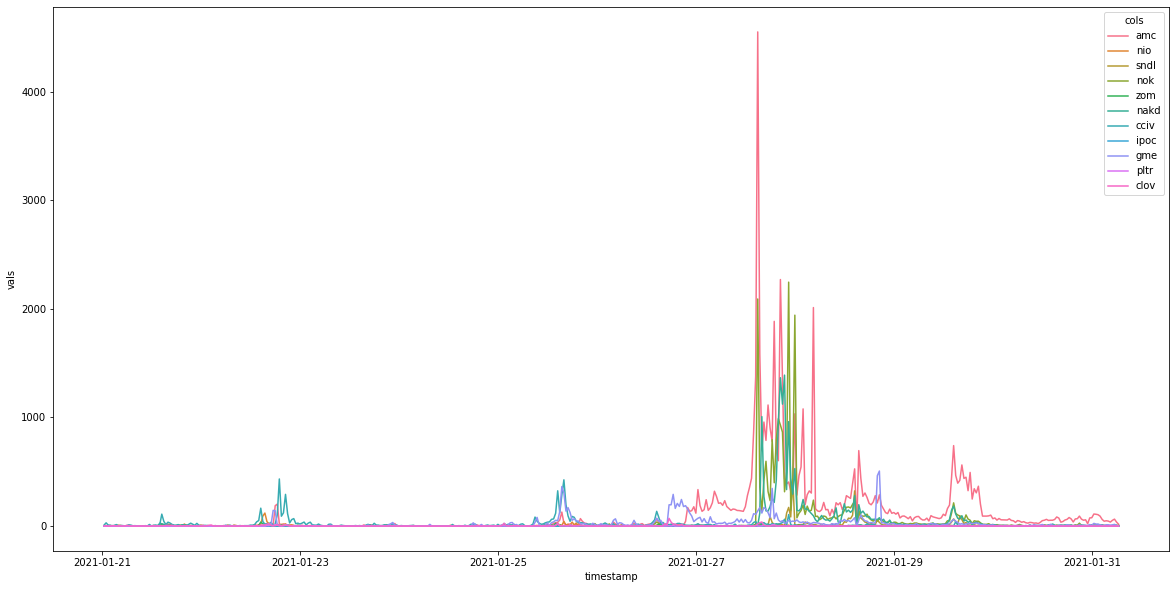

In [79]:
fig, ax = plt.subplots(figsize=(20,10))
df = message_counts.drop(columns=['n_messages', 'total_text','avg_message_len']).loc[
        message_counts['timestamp'] > '2021-01-21'].reset_index(drop=True)
df = df.melt('timestamp', var_name='cols', value_name='vals')
sns.lineplot(x="timestamp", y="vals", hue='cols', data=df, ax=ax)

In [80]:
message_count_percentages = message_counts
for col in tickers_of_interest:
    message_count_percentages[col] /= message_count_percentages['total_text']

<AxesSubplot:xlabel='timestamp', ylabel='vals'>

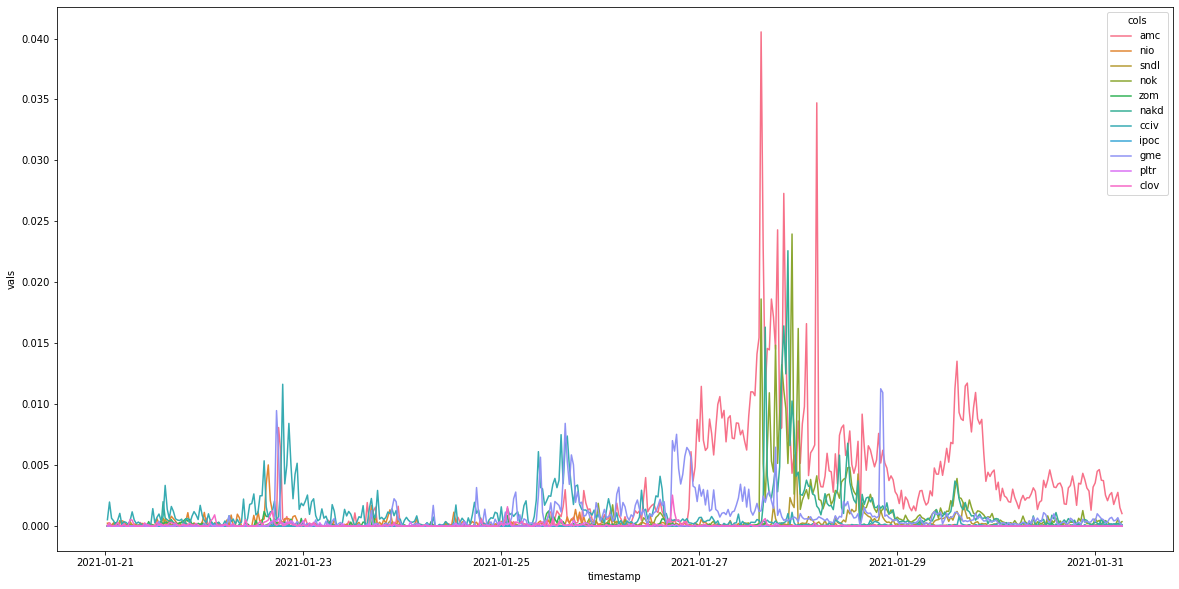

In [89]:
fig, ax = plt.subplots(figsize=(20,10))
df = message_count_percentages.drop(columns=['n_messages', 'total_text','avg_message_len']).loc[
        message_count_percentages['timestamp'] > '2021-01-21'].reset_index(drop=True)
df = df.melt('timestamp', var_name='cols', value_name='vals')
sns.lineplot(x="timestamp", y="vals", hue='cols', data=df, ax=ax)

<AxesSubplot:xlabel='timestamp', ylabel='gme'>

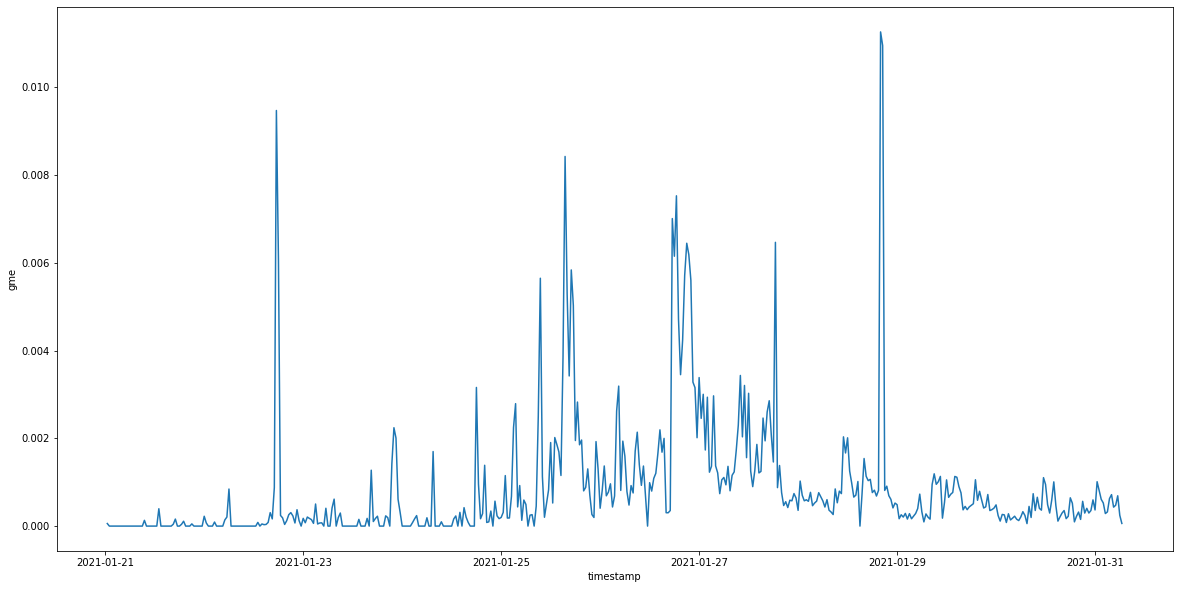

In [111]:
fig, ax = plt.subplots(figsize=(20,10))
df = message_count_percentages.loc[message_count_percentages['timestamp'] > '2021-01-21'].reset_index(drop=True)
# df['gme'] = df['gme'].apply(lambda x: np.log(x+1))
sns.lineplot(x="timestamp", y="gme", data=df, ax=ax)

In [11]:
# import yfinance as yf

In [53]:
# determine if ticker symbol exists... create dict of non ticker words for future
# all_non_tickers = []
# for ticker in ticker_counts['ticker']:
#     t = yf.Ticker(ticker)
#     print('-',end='')
#     try:
#         x = t.dividends
#     except:
#         all_non_tickers.append(ticker)

In [15]:
# import pickle
# with open('non_tickers.pkl', 'wb') as f:
#     pickle.dump(all_non_tickers, f)

In [ ]:
# sense ticker symbols in chat

In [26]:
data = json.load(open('stock_vip.json'))

In [124]:
bot_messages = messages.loc[messages['is_bot'] == True].reset_index(drop=True)
messages = messages.loc[messages['is_bot'] == False].reset_index(drop=True)

In [76]:
# def is_gamestop(s):
#     if 'gme' in s.lower() or 'gamestop' in s.lower():
#         return True
#     return False

# def is_amc(s):
#     if 'amc' in s.lower():
#         return True
#     return False

# def is_doge(s):
#     if 'doge' in s.lower():
#         return True
#     return False

In [77]:
messages['gme'] = messages['content'].apply(lambda s: is_gamestop(s))
messages['amc'] = messages['content'].apply(lambda s: is_amc(s))
messages['doge'] = messages['content'].apply(lambda s: is_doge(s))

In [85]:
sum(messages['gme'])

5014

In [126]:
message_counts = messages.groupby(pd.Grouper(key='timestamp', freq='30min')).apply(
    lambda group: get_group_counts(group)).reset_index(level=0).reset_index(drop=True)

<AxesSubplot:xlabel='timestamp', ylabel='vals'>

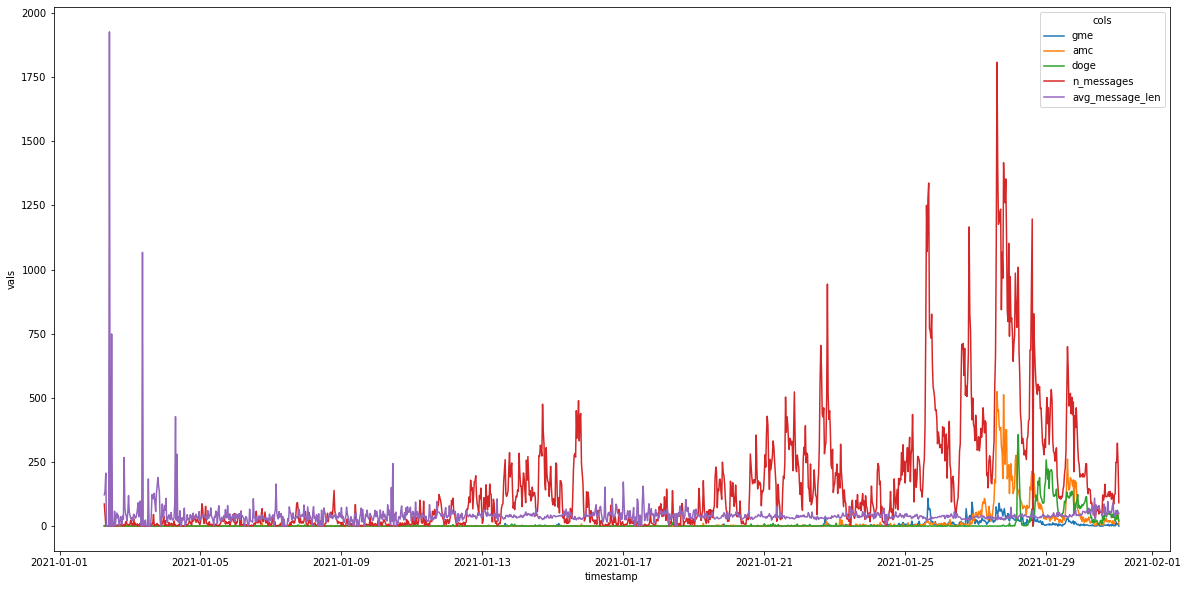

In [127]:
fig, ax = plt.subplots(figsize=(20,10))
# sns.lineplot(x='timestamp', y = 'gme', color='indianred', ax=ax)
# sns.lineplot(x='timestamp', y = 'amc', color='b', ax=ax)\
# sns.lineplot(x='timestamp', y = 'amc', color='b', ax=ax)\
df = message_counts.melt('timestamp', var_name='cols',  value_name='vals')
sns.lineplot(x="timestamp", y="vals", hue='cols', data=df, ax=ax)

In [128]:
def get_percent_counts(row, col_of_interest):
    return 0 if not row['n_messages'] else row[col_of_interest] / row['n_messages']

In [129]:
message_counts['percent_gme'] = message_counts.apply(lambda row: get_percent_counts(row, 'gme'), axis=1)
message_counts['percent_amc'] = message_counts.apply(lambda row: get_percent_counts(row, 'amc'), axis=1)
message_counts['percent_doge'] = message_counts.apply(lambda row: get_percent_counts(row, 'doge'), axis=1)

<AxesSubplot:>

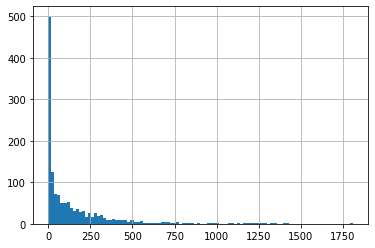

In [137]:
message_counts['n_messages'].hist(bins=100)

In [140]:
message_percentages = message_counts.drop(columns = ['gme', 'amc', 'doge', 'avg_message_len'])
message_percentages['n_messages'] = message_percentages['n_messages'].apply(lambda x: np.log(x + 1) / 8)

In [150]:
users = pd.DataFrame(messages['author_id'].value_counts()).reset_index().rename(columns={'index': 'author_id', 'author_id': 'count'})

In [152]:
def get_perc_for_user(df, col_of_interest):
    return sum(df[col_of_interest]) / df.shape[0]

In [153]:
users['perc_gme'] = users['author_id'].apply(lambda x: get_perc_for_user(messages.loc[messages['author_id'] == x], 'gme'))

In [154]:
users['perc_amc'] = users['author_id'].apply(lambda x: get_perc_for_user(messages.loc[messages['author_id'] == x], 'amc'))

In [155]:
users['perc_doge'] = users['author_id'].apply(lambda x: get_perc_for_user(messages.loc[messages['author_id'] == x], 'doge'))

In [162]:
users = users.loc[users['count'] > 30].reset_index(drop=True)

<AxesSubplot:>

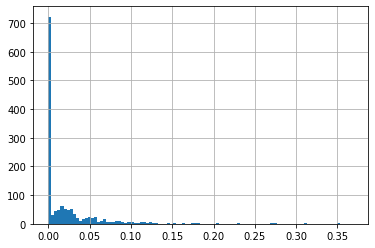

In [165]:
users['perc_gme'].hist(bins = 100)

<AxesSubplot:>

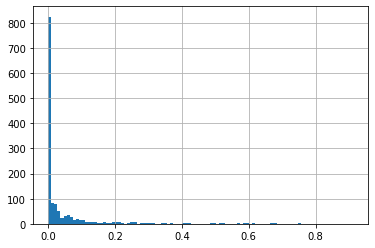

In [166]:
users['perc_doge'].hist(bins = 100)

<AxesSubplot:>

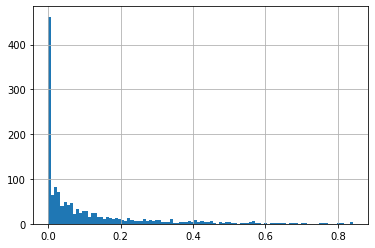

In [167]:
users['perc_amc'].hist(bins = 100)

<AxesSubplot:xlabel='timestamp', ylabel='vals'>

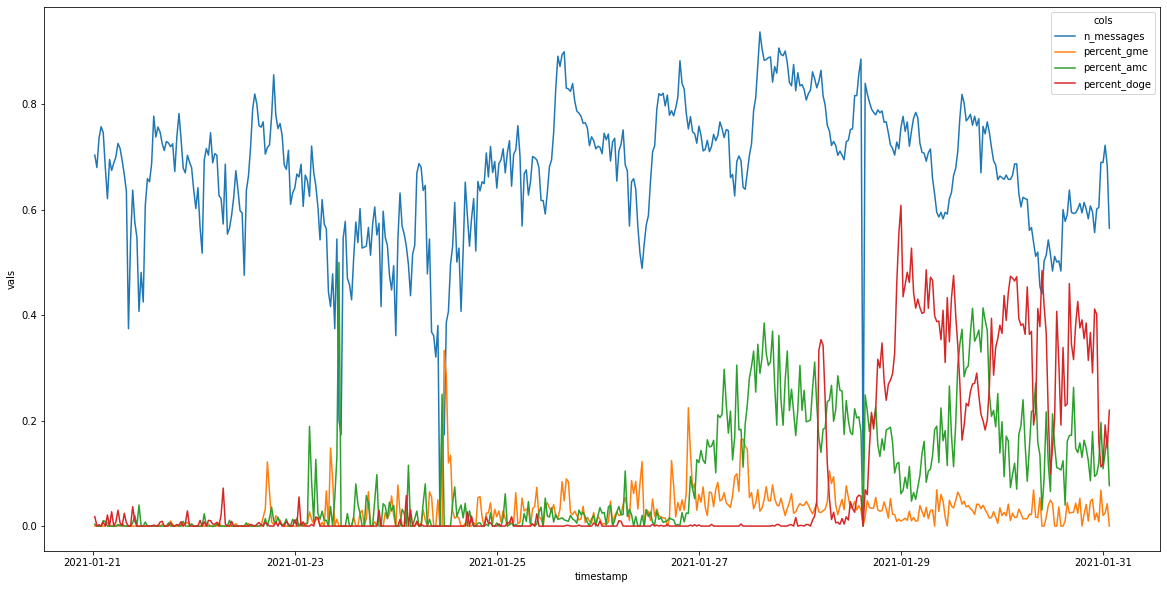

In [141]:
fig, ax = plt.subplots(figsize=(20,10))
df = message_percentages.loc[message_percentages['timestamp'] > '2021-01-21']
df = df.melt('timestamp', var_name='cols', value_name='vals')
sns.lineplot(x="timestamp", y="vals", hue='cols', data=df, ax=ax)